In [263]:
import pandas as pd 
import numpy as np
import glob
import imageio as iio
from pathlib import Path
import matplotlib.pyplot as plt

In [264]:
meta_data = pd.read_csv('data/HAM10000_metadata.csv')

In [265]:
meta_data

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [266]:
# getting image paths in an array
JPG_IMAGES_PART_1 = glob.glob('data/ham10000_images_part_1/*.jpg')

JPG_IMAGES_PART_2 = glob.glob('data/ham10000_images_part_2/*.jpg')



In [267]:
print(JPG_IMAGES_PART_1[0:3])
print(JPG_IMAGES_PART_2[0:3])

['data/ham10000_images_part_1/ISIC_0027950.jpg', 'data/ham10000_images_part_1/ISIC_0027764.jpg', 'data/ham10000_images_part_1/ISIC_0029011.jpg']
['data/ham10000_images_part_2/ISIC_0031413.jpg', 'data/ham10000_images_part_2/ISIC_0032036.jpg', 'data/ham10000_images_part_2/ISIC_0032809.jpg']


In [268]:
# Check if files are loaded by getting first 3
df1 = pd.DataFrame({
    'image_path' : JPG_IMAGES_PART_1,
})

df2 = pd.DataFrame({
    'image_path' : JPG_IMAGES_PART_2,
})

In [269]:
print(df1.size)
print(df2.size)

5000
5015


In [270]:
meta_data[0:5]

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [271]:
df_all_images = df1.append(df2)
print("Total Size:", df_all_images.size)
df_all_images[0:5]

Total Size: 10015


/tmp/ipykernel_5459/888779974.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_images = df1.append(df2)


image_path
0  data/ham10000_images_part_1/ISIC_0027950.jpg
1  data/ham10000_images_part_1/ISIC_0027764.jpg
2  data/ham10000_images_part_1/ISIC_0029011.jpg
3  data/ham10000_images_part_1/ISIC_0029197.jpg
4  data/ham10000_images_part_1/ISIC_0025675.jpg

In [272]:
df_all_images['image_id'] = df_all_images['image_path'].apply(str)

In [273]:
df_all_images.dtypes

image_path    object
image_id      object
dtype: object

In [274]:

df_all_images['image_id'] = df_all_images['image_id'].str.replace('data/ham10000_images_part_1/', '')

df_all_images['image_id'] = df_all_images['image_id'].str.replace('data/ham10000_images_part_2/', '')

In [275]:
df_all_images['image_id'] = df_all_images['image_id'].str.replace('.jpg', '')

/tmp/ipykernel_5459/2090404116.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_all_images['image_id'] = df_all_images['image_id'].str.replace('.jpg', '')


In [276]:
df_all_images.reset_index(inplace=True, drop=True)
meta_data.reset_index(inplace=True, drop=True)

In [277]:
# Inner Join dataset on image_id
df_merged = pd.merge(left=meta_data, right=df_all_images)

In [278]:
df_merged

lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

                                         image_path  
0      data/ham10000_images_part_1/ISIC_0027419.jpg  
1      data/ham10000_images_part_1/ISIC_0025030.jpg  
2      data/ham10000_images_part_1/ISIC_0026769.jpg  
3      data/ham10000_images_part_1/ISIC_0025661.jpg  
4      data/ham10000_images_part_2/ISIC_0031633.jpg  
...                                             ...  
10010  data/ham10000_images_part_2/ISIC_0033084.jpg  
10011  data/ham10000_images_part_2/ISIC_0033550.jpg  
10012  data/ham10000_images_part_2/ISIC_0033536.jpg  
10013  data/ham10000_images_part_2/ISIC_0032854.jpg  
10014  data/ham10000_images_part_2/ISIC_0032258.jpg  

[10015 rows x 8 columns]

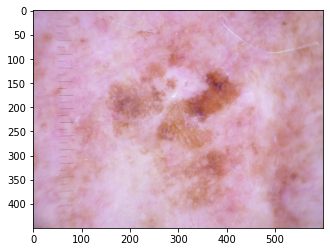

In [287]:
# image to RGB and back to image
im = iio.imread(df_merged['image_path'][0])

plt.imshow(im)

In [285]:
df_merged.to_csv('merged.csv')